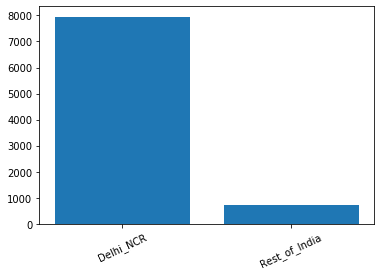

In [7]:
"""


1. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

Answer : First we have to filter out all the country whose country-code is not 1.
Next I have made one dictionary where I am keeping all the cities which are in Delhi-NCR which will help me to segregate. Next
thing I have done I have made one dictionary wherein I kept two keys, first one as Delhi_NCR and and second one as
Rest_of_India. I have applied one function that is city_ which is helping me
to store the count in the dictionary and at the same time i am using this functions to handle strings in 'city' column.
Eventually I will get the desiredresult in the 'count_of_restaurent' dictionary. Finally i traveresed the dictionary and stored
the key and value in two seperate lists , one list has all the names and the other list has the frequency.
After that I have plot a bar graph using those two lists and we can see Delhi_NCR has the ample number of 
restaurant as compared to Rest_of_India.

"""

# Packages
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import json


# Load Zomato Dataset
df =  pd.read_csv(r'C:\Users\vatsaly\Downloads\zomato.csv',encoding='latin-1') #for some reason utf encoding is not working , so
# Filtering Only Indian Restaurants                                            #i have applied solution given on stack-overflow
df = df[df['Country Code']==1]


# A dictionary for counting purposes
count_of_restaurent = {'Delhi_NCR':0,'Rest_of_India':0}

# Delhi-NCR cities 
delhi_ncr = {'New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'}

def city_(city_name):
    if city_name in delhi_ncr:
        count_of_restaurent['Delhi_NCR']+=1
        return "Delhi_NCR"
    else:
        count_of_restaurent['Rest_of_India']+=1
        return "Rest_of_India"

# Update city_name with group name for future use.
city = df.copy()
city['City'] = city['City'].apply(city_)


name = []
restaurant_count = []
for key,value in count_of_restaurent.items():
    name.append(key)
    restaurant_count.append(value)


plt.bar(name,restaurant_count)
plt.xticks(rotation=25)
plt.show()


In [8]:
"""
2. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.
Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR 
or just it due to incomplete dataset.

Answer : For given dataset I have found four cuisine which are not present in Delhi-NCR restaurants and they are
German , Cajun , Malwani , BBQ but after checking with Zomato API I have found that some of them are present in Delhi-NCR
restaurants. So the dataset must be having missing data. 

In this question i have made a seperate column 'City_Cuisines' which combines the data of the 'city' and 'Cuisines' column and i
have concatenated these two strings with some special characters so that i can use split() function to extract both data
indivisualy from a single column
After that i created two sets and to insert revelant data in them i used the function 'city_cuisines' on column 'City_cuisines'.
With the help of those two sets i found out what cuisnes are not available in delhi, For verification purposes i used the zomato
api.

KINDLY USE YOUR OWN API KEY FOR THIS QUESTION
"""
city["City_Cuisines"] = city['City'] + "/" + city['Cuisines'] #city is a dataframe of zomato.csv where the city is either
                                                                #delhi-ncr or Rest of india

# Store cuisines depending on their city 
restaurant_cuisines = set() #using sets to get cuisines dont get repeated
delhi_ncr_cuisines = set()

def city_cuisines(cuisines):
    city = cuisines.split("/")[0]
    cuisines = cuisines.split("/")[1].split(", ")
    if city=="Delhi_NCR":
        for cuisine in cuisines:
            delhi_ncr_cuisines.add(cuisine)
    else:
        for cuisine in cuisines:
            restaurant_cuisines.add(cuisine)
    return cuisines
            

city["City_Cuisines"].apply(city_cuisines)

cuisines_not_available_in_delhi_ncr = []
for cuisine in restaurant_cuisines:
    if cuisine in delhi_ncr_cuisines:
        continue
    else:
        cuisines_not_available_in_delhi_ncr.append(cuisine)


# Cuisines not in Delhi_NCR
print(*cuisines_not_available_in_delhi_ncr)
        
        
# Verify with zomato's actual data
headers = {'user-key': 'use you own key plz'}
path = "https://developers.zomato.com/api/v2.1/cuisines?city_id=1"
response = requests.get(path,headers=headers)
cuisines = json.loads(response.text)['cuisines']

# Indicates whether cuisine present in Delhi-NCR or not
is_present = False
for cuisine in cuisines:
    if cuisine['cuisine']['cuisine_name'] in cuisines_not_available_in_delhi_ncr:
        is_present = True
        break
    
# Here True Means dataset has missing values. False means indicates there is no missing values.     
print(is_present)



Cajun BBQ German Malwani
True


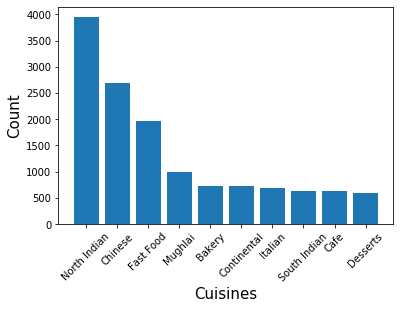

In [9]:
"""
3. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

Answer: I created a dictionary named cuisines_count where cuisine name is the key and value is 
the count. By using the function get cuisines i am storing the frequncy of every cuisine type in the dictionary.
Once dictionary is ready , I have made one list of list and 0th column is for count and 1st column
is for the cuisine name/type. I have sorted the list based on the count and then I picked top 10. After ploting graph based on
the data from the list , i got following as the top 10 

Top ten cuisines that are being served in Delhi-NCR and Rest of India are :
#1. North Indian
#2. Chinese
#3. Fast Food
#4. Mughlai
#5. Bakery
#6. Contental
#7. Italian
#8. South Indian
#9. Cafe
#10. Desserts
"""

cuisines_count = {} #dictionary for cuisine-type count

def get_cuisines(cuisines):
#     print(type(cuisines))
    list_of_cuisines = cuisines.split(", ")
    for cuisine in list_of_cuisines:
        cuisines_count[cuisine] = cuisines_count.get(cuisine,0)+1

city['Cuisines'].apply(get_cuisines)
cuisine_name_count = []
for key,value in cuisines_count.items():
    cuisine_name_count.append([value,key])

cuisine_name_count.sort(reverse = True)


cuisines = [ i[1] for i in cuisine_name_count[:10]]
counts = [ i[0] for i in cuisine_name_count[:10]]

plt.bar(cuisines,counts)
plt.xticks(rotation=45)
plt.xlabel("Cuisines",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

Delhi-NCR  86
Rest India  70


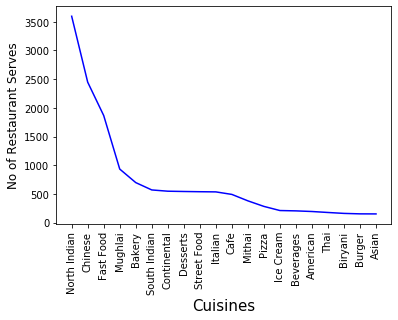

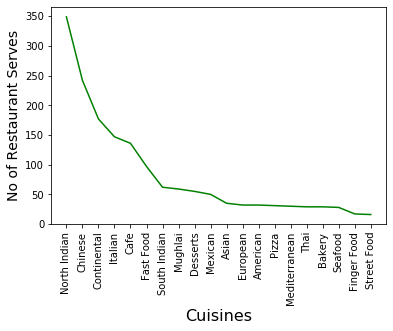

In [10]:
"""
4. Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India.
Plot the suitable graph to explain your inference.

Answer : The graph we plotted in this question indicates that North Indian, Chinese Cuisine are servered the most
in both places , But number of cuisines served/available has a huge difference, North Indian cuisinse is served by more 
than 3500 restaurants in Delhi NCR but this data drops drastically in Rest of India, and that is only 350 restaurents or so and 
same goes for Chinese cuisine. Third most servered cuisine in Delhi NCR is Fast Food where as for Rest of India is Continental and
there is some order difference in terms of cuisines served/available also. There are total 86 different cuisines that are offered in 
Delhi-NCR where as in Rest India offers 70 different cuisines.

"""

delh_ncr_cuisines_with_count = {}
rest_of_india_cuisines_with_count = {}






def city_cuisines_with_count(city_cuisines): #Its the same as the function i used in previous question , its storing the 
                                             # frequency of cuisines in two different dictionaries one for delhi and one for 
    city = city_cuisines.split("/")[0]       # rest of india
    list_cuisines = city_cuisines.split("/")[1].split(", ")
    if city=="Delhi_NCR":
        for cuisine in list_cuisines:
            delh_ncr_cuisines_with_count[cuisine] = delh_ncr_cuisines_with_count.get(cuisine,0)+1
    else:
        for cuisine in list_cuisines:
            rest_of_india_cuisines_with_count[cuisine] = rest_of_india_cuisines_with_count.get(cuisine,0)+1
            
city["City_Cuisines"].apply(city_cuisines_with_count)


no_of_cuisines_in_delhi_ncr = len(delh_ncr_cuisines_with_count)
no_of_cuisines_in_rest_india = len(rest_of_india_cuisines_with_count)
print("Delhi-NCR ",no_of_cuisines_in_delhi_ncr)
print("Rest India ",no_of_cuisines_in_rest_india)

delhi_ncr_cuisine_with_count = [[value,key] for key,value in delh_ncr_cuisines_with_count.items()]
rest_india_cuisine_with_count = [[value,key] for key,value in rest_of_india_cuisines_with_count.items()]

delhi_ncr_cuisine_with_count.sort(reverse = True) #sorting in decending order
rest_india_cuisine_with_count.sort(reverse = True)

delhi_ncr_cuisine = [ i[1] for i in delhi_ncr_cuisine_with_count][:20]
delhi_ncr_count = [ i[0] for i in delhi_ncr_cuisine_with_count][:20]
rest_india_cuisine = [ i[1] for i in rest_india_cuisine_with_count][:20]
rest_india_count = [ i[0] for i in rest_india_cuisine_with_count][:20]


plt.plot(delhi_ncr_cuisine,delhi_ncr_count,c="b")
plt.xticks(rotation=90)
plt.xlabel("Cuisines", size = 15)
plt.ylabel("No of Restaurant Serves", size = 12)
plt.show()

plt.plot(rest_india_cuisine,rest_india_count,c="g")
plt.xticks(rotation=90)
plt.xlabel("Cuisines", size = 16)
plt.ylabel("No of Restaurant Serves", size = 14)
plt.show()
